분석 : 캐글러 대상 설문조사
설문기간 : 2017년 8월 7일 ~ 8월 25일
응답자 : 171개 국가 및 지역 16,716명
특징
    50명 미만의 특정 국가 및 지역일 경우 '기타'그룹
    설문조사 시스템에 신고 된 응답자와 필수질문(취업상태)에 미응답자 제외
    대부분의 조사자는 이메일, 토론 포럼 및 소셜미디어 캐글 채널로 설문을 알게 됨
    급여데이터는 일부 통화에서만 받고 해당 되는 통화에 기준하여 작성
    미국 달러로 환산이 가능한 csv제공
    취업자와 미취업자의 설문은 다름

데이터파일
    schema.csv : 설문 스키마가 있는 csv. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열에 해당하는 질문 포함
    multipleChoiceResponses.csv : 객관식 및 순위 질문 응다바자 답변, 각 행은 한 응답자의 응답
    freeformResponses.csv : Kaggle의 설문조사 질문에 대한 응답의 주관식 답변. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
    conversionRates.csv : R패키지 "quantmod"에서 2017년 9월 14일 액세스 한 통화 변환율(USD)
    RespondentTupeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩 스키마

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('C:/Users/user/Desktop/workSpace/분석/데이터/kaggle_2017_survey/schema.csv')
question.shape

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
mcq = pd.read_csv('C:/Users/user/Desktop/workSpace/분석/데이터/kaggle_2017_survey/multipleChoiceResponses.csv', engine = 'python')    # 오류가 나면 low_memory = False
mcq.shape

(16716, 228)

In [5]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

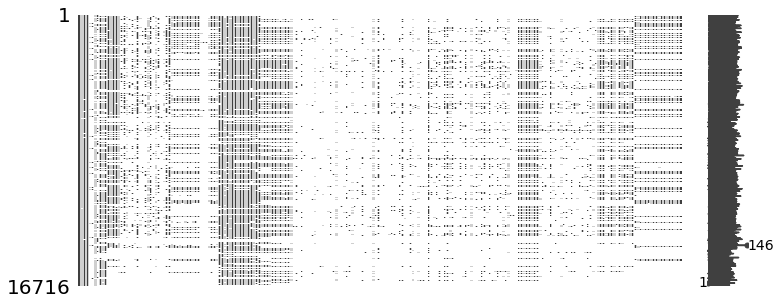

In [7]:
# missingno는 결착치 데이터 시각화
# 결측치 데이터 칼럼이 많아 아래 그래프만으로는 내용을 파악하기 힘들다

# !pip install missingno
import missingno as msno

msno.matrix(mcq, figsize = (12,5))

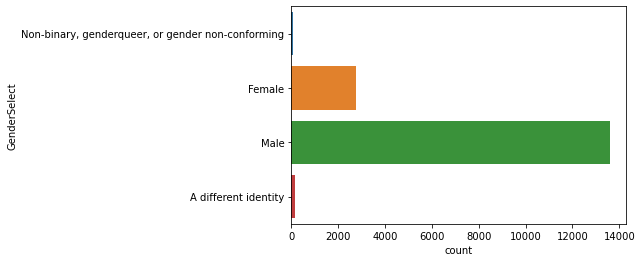

In [8]:
# 성별
sns.countplot(y='GenderSelect', data = mcq)

In [9]:
# contry 칼럼을 인덱스 지정

con_df = pd.DataFrame(mcq['Country'].value_counts())
print(con_df)


                             Country
United States                   4197
India                           2704
Other                           1023
Russia                           578
United Kingdom                   535
People 's Republic of China      471
Brazil                           465
Germany                          460
France                           442
Canada                           440
Australia                        421
Spain                            320
Japan                            277
Taiwan                           254
Italy                            238
Netherlands                      205
Ukraine                          196
South Korea                      194
Singapore                        184
Poland                           184
Pakistan                         161
Turkey                           144
Indonesia                        131
Switzerland                      129
South Africa                     127
Mexico                           126
C

In [10]:
# 칼럼의 순서대로 응담 수, 국가로 칼럼명 지정
con_df['국가'] = con_df.index
on_df.columns = ['응답 수', '국가']

# 인덱스 칼럼을 삭제하고 순위를 알기 위해 reset_index()한다.
con_df = con_df.reset_index().drop('index', axis = 1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

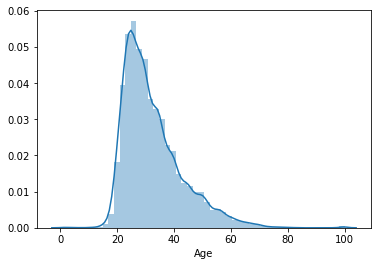

In [11]:
# 연령에 대한 정보를 본다 (R의 summary)
display(mcq['Age'].describe())
display(sns.distplot(mcq[mcq['Age'] > 0]['Age']))

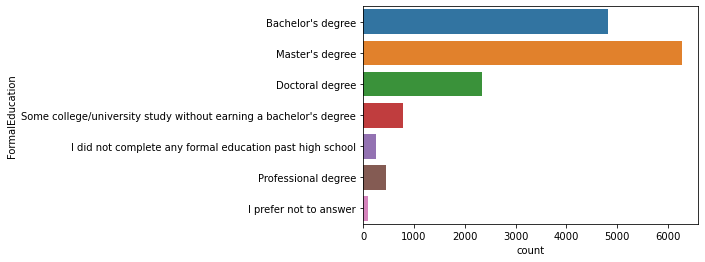

In [12]:
# 학력에 대한 그래프
sns.countplot(y = 'FormalEducation', data = mcq)

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


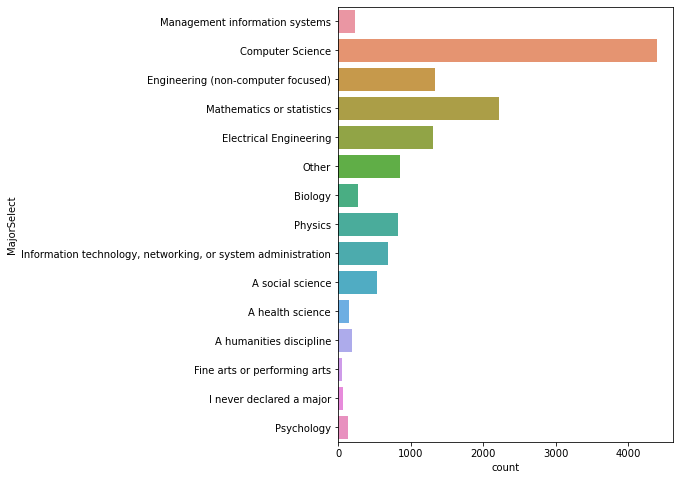

In [13]:
# value_counts를 사용하면 그룹화 된 데이터의 카운트 값을 보여준다.
# normalize = True 옵션은 데이터의 비율을 나타낸다.
# 다음 그래프는 응답자들의 전공과 비율을 나타내는 표.
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize = True))
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index = True, right_index = True)
mcq_major_df.columns = ['응답 수', '비율']

# 시각화
plt.figure(figsize = (6, 8))

display(mcq_major_df)
display(sns.countplot(y = 'MajorSelect', data = mcq))

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


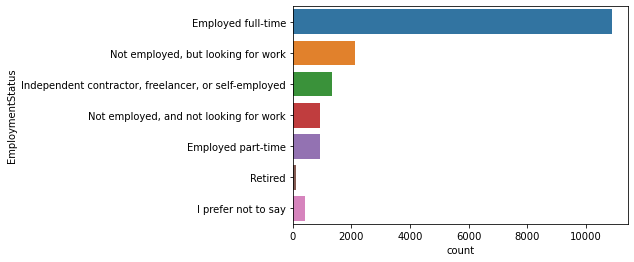

In [14]:
# 취업여부의 응답 수와 비율
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize = True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index = True, right_index = True)
mcq_es_df.columns = ['응답 수', '비율']


display(mcq_es_df)
display(sns.countplot(y = 'EmploymentStatus', data = mcq))    # seaborn에서 바로 시각화 그래프 출력

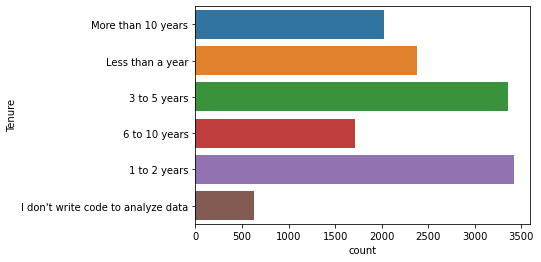

In [15]:
# Tenure항목은 데이터 사이언스 분야에서 코딩 경험이 얼마나 되는가 질문
# 대부분이 5년 미만, 1,2년 경험이 많다.
sns.countplot(y = 'Tenure', data = mcq)

The number of interviewees in Korea:194


<function matplotlib.pyplot.show(*args, **kw)>

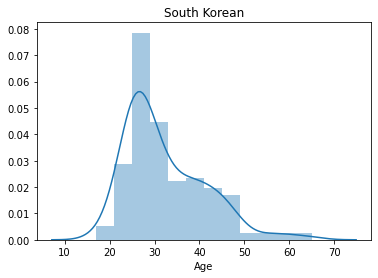

In [17]:
# 우리나라만 추출해 시각화(결측치는 삭제)
korea = mcq.loc[(mcq['Country'] == 'South Korea')]

print('The number of interviewees in Korea:' + str(korea.shape[0]))    # + str(korea.shape[0]) 응답자 수

sns.distplot(korea['Age'].dropna())
plt.title('South Korean')
plt.show

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korea')

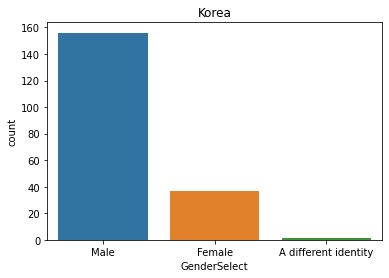

In [21]:
# 한국인의 성비와 시각화
sns.countplot(x='GenderSelect', data = korea)

display(pd.DataFrame(korea['GenderSelect'].value_counts()))
display(plt.title('Korea'))

Text(0.5, 1.0, 'korean Male')

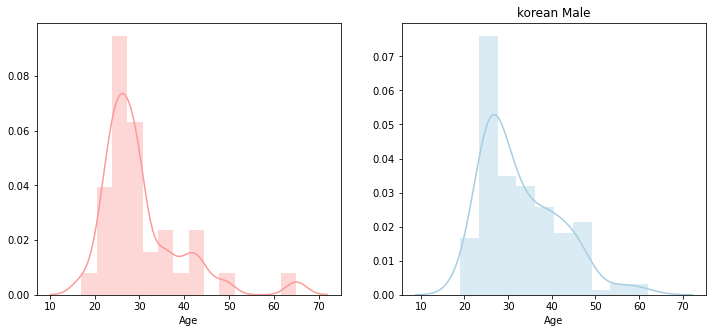

In [29]:
# 성별을 연령대로 나누어 시각화
figure, (ax1, ax2) = plt.subplots(ncols = 2)

figure.set_size_inches(12, 5)
sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Female'].dropna(),
            norm_hist = False, color = sns.color_palette("Paired")[4], ax = ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Male'].dropna(),
            norm_hist = False, color = sns.color_palette("Paired")[0], ax = ax2)
plt.title('korean Male')

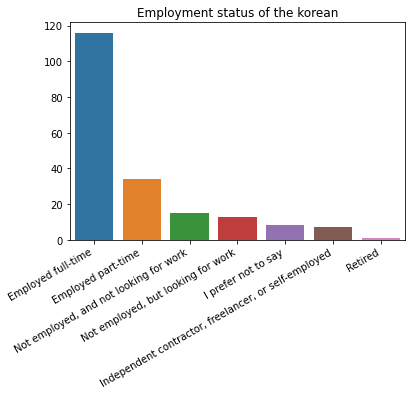

In [35]:
sns.barplot(x = korea['EmploymentStatus'].unique(), y = korea['EmploymentStatus'].value_counts())
plt.xticks(rotation = 30, ha = 'right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

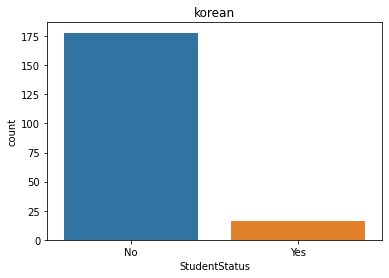

In [36]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x = 'StudentStatus', data = korea)
plt.title('korean')
plt.show()

In [37]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


In [ ]:
# 
sns.countplot(y = )